In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Heart.csv")
df.head()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [3]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
df.shape

(303, 14)

In [5]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [6]:
(df==0).sum()

Age            0
Sex           97
ChestPain      0
RestBP         0
Chol           0
Fbs          258
RestECG      151
MaxHR          0
ExAng        204
Oldpeak       99
Slope          0
Ca           176
Thal           0
AHD            0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df["Ca"] = imputer.fit_transform(df[["Ca"]])

In [10]:
df.isna().sum()


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
AHD          0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ["ChestPain", "Thal", "AHD"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [12]:
# Define features (X) and target variable (y)
X = df.drop(columns=["AHD"])  # Features
y = df["AHD"] # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)


In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[27  6]
 [ 1 27]]


Text(0.5, 23.52222222222222, 'Actual')

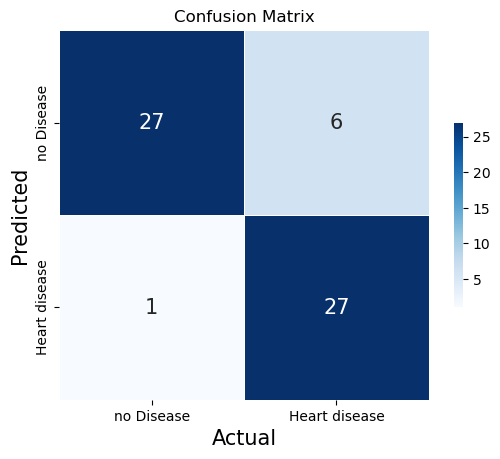

In [24]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['no Disease', 'Heart disease'], yticklabels=['no Disease', 'Heart disease'], linewidths=0.5, annot_kws={'fontsize':15}, square=True, cbar_kws={"shrink": .5}, ax=None)
plt.title('Confusion Matrix')

plt.ylabel('Predicted', fontsize = 15)
plt.xlabel('Actual', fontsize = 15 )

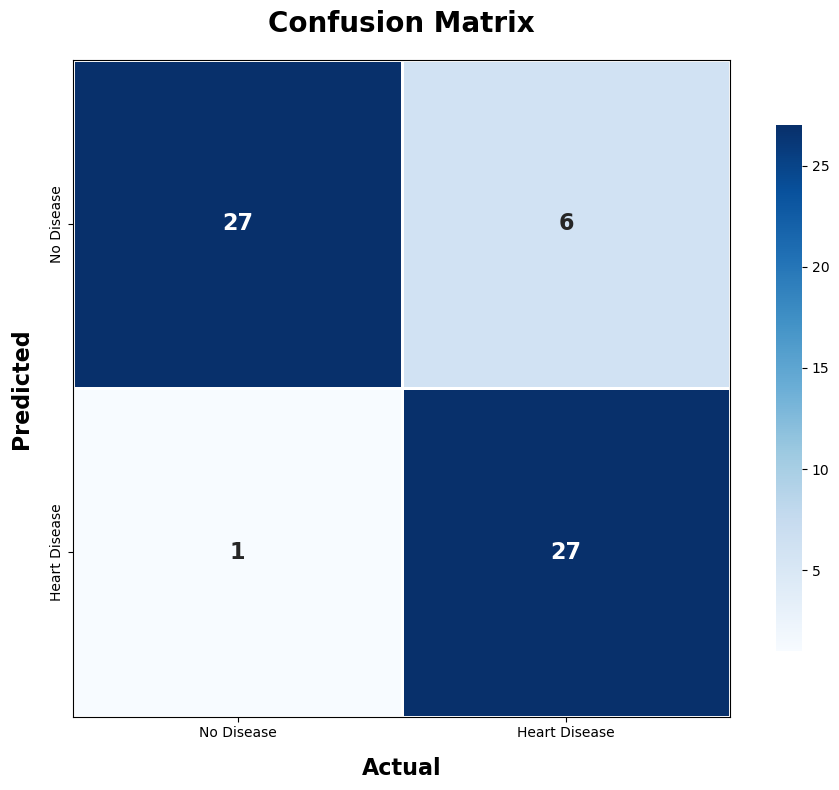

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Heart Disease'], 
            yticklabels=['No Disease', 'Heart Disease'],
            linewidths=2, annot_kws={'fontsize':16, 'fontweight':'bold'}, 
            square=True, cbar_kws={"shrink": .8})

plt.title('Confusion Matrix', fontsize=20, fontweight='bold', pad=20)
plt.ylabel('Predicted', fontsize=16, fontweight='bold', labelpad=12)
plt.xlabel('Actual', fontsize=16, fontweight='bold', labelpad=12)

# Add a border to the plot
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

plt.tight_layout()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("\nAccuracy:", round(accuracy * 100, 2), "%")
print("Precision:", round(precision * 100, 2), "%")
print("Recall:", round(recall * 100, 2), "%")
print("F1-Score:", round(f1 * 100, 2), "%")


Accuracy: 88.52 %
Precision: 81.82 %
Recall: 96.43 %
F1-Score: 88.52 %
